# Hybrid Image

Hybrid image is the sum of a low-pass filtered image and a high-pass filtered image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_image(fname):
    img = cv2.imread(fname, 0)    # gray image
    return img

In [3]:
def ideal_low_pass_filter(size_x, size_y, cutoff=0.5):
    H = np.zeros((size_x, size_y))
    center_x = int(size_x/2)
    center_y = int(size_y/2)
    for i in range(size_x):
        u = i-center_x
        for j in range(size_y):
            v = j-center_y
            H[i,j] = (u**2+v**2)**(1/2)
#     print("low-pass H: {0}\n{1}".format(H.shape, H))
    for i in range(size_x):
        for j in range(size_y):
            if H[i,j]<=cutoff:
                H[i,j]=1
            else:
                H[i,j]=0
#     print("low-pass-filter: {0}\n{1}".format(H.shape, H))
    return H

In [4]:
def ideal_high_pass_filter(size_x, size_y, cutoff=0.5):
    H = np.zeros((size_x, size_y))
    center_x = int(size_x/2)
    center_y = int(size_y/2)
    for i in range(size_x):
        u = i-center_x
        for j in range(size_y):
            v = j-center_y
            H[i,j] = (u**2+v**2)**(1/2)
#     H /= H[-1,-1]    # do the normalization
    print("high-pass H: {0}\n{1}".format(H.shape, H))
    for i in range(size_x):
        for j in range(size_y):
            if H[i,j]<=cutoff:
                H[i,j]=0
            else:
                H[i,j]=1
#     print("high-pass-filter: {0}\n{1}".format(H.shape, H))
    return H

In [5]:
def gaussian_low_pass_filter(size_x, size_y, cutoff=10):
    H = np.zeros((size_x, size_y))
    center_x = int(size_x/2)
    center_y = int(size_y/2)
    for i in range(size_x):
        u = i-center_x
        for j in range(size_y):
            v = j-center_y
            H[i,j] = np.exp(-(u**2+v**2)/(2*cutoff**2))
#     print("low-pass-filter: {0}\n{1}".format(H.shape, H))
    return H

In [6]:
def gaussian_high_pass_filter(size_x, size_y, cutoff=10):
    H = np.zeros((size_x, size_y))
    center_x = int(size_x/2)
    center_y = int(size_y/2)
    for i in range(size_x):
        u = i-center_x
        for j in range(size_y):
            v = j-center_y
            H[i,j] = 1-np.exp(-(u**2+v**2)/(2*cutoff**2))
#     print("high-pass-filter: {0}\n{1}".format(H.shape, H))
    return H

In [7]:
def get_magnitude_spectrum(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return magnitude_spectrum, fshift

In [8]:
def plot_img(img_1, img_2, camp=None):
    plt.figure(figsize=(10,8))
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_1, cmap = camp)
    ax[1].imshow(img_2, cmap = camp)
    plt.tight_layout()

<Figure size 720x576 with 0 Axes>

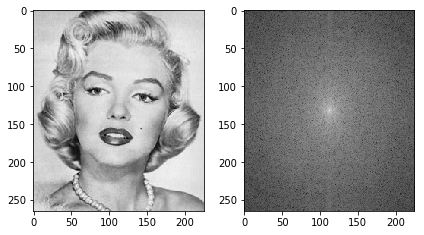

<Figure size 720x576 with 0 Axes>

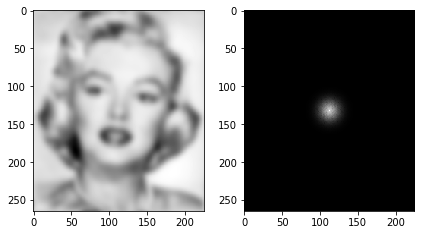

<Figure size 720x576 with 0 Axes>

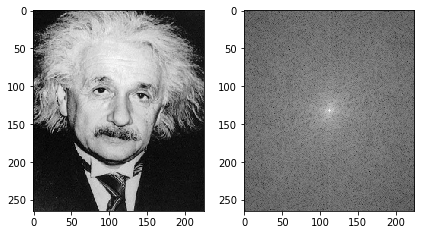

<Figure size 720x576 with 0 Axes>

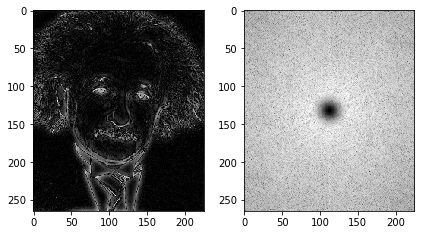

In [9]:
img_1 = read_image('./hw2_data/task1and2_hybrid_pyramid/marilyn.bmp')
magnitude_spectrum_1, fshift_1 = get_magnitude_spectrum(img_1)
filter_1 = gaussian_low_pass_filter(magnitude_spectrum_1.shape[0], magnitude_spectrum_1.shape[1], cutoff=10)
result_1 = magnitude_spectrum_1*filter_1
out_1 = fshift_1*filter_1
fshift_1 = np.fft.ifftshift(out_1)
img_back_1 = np.fft.ifft2(fshift_1)
img_back_1 = np.abs(img_back_1)

img_2 = read_image('./hw2_data/task1and2_hybrid_pyramid/einstein.bmp')
magnitude_spectrum_2, fshift_2 = get_magnitude_spectrum(img_2)
filter_2 = gaussian_high_pass_filter(magnitude_spectrum_2.shape[0], magnitude_spectrum_2.shape[1], cutoff=10)
result_2 = magnitude_spectrum_2*filter_2
out_2 = fshift_2*filter_2
fshift_2 = np.fft.ifftshift(out_2)
img_back_2 = np.fft.ifft2(fshift_2)
img_back_2 = np.abs(img_back_2)

plot_img(img_1, magnitude_spectrum_1, 'gray')
plot_img(img_back_1, result_1, 'gray')
plot_img(img_2, magnitude_spectrum_2, 'gray')
plot_img(img_back_2, result_2, 'gray')

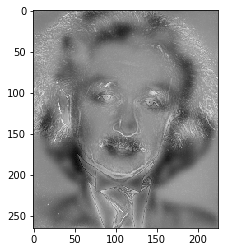

In [10]:
image_hybrid = img_back_1+img_back_2
plt.imshow(image_hybrid, cmap = 'gray')
plt.show()